In [42]:
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from os.path import expanduser
home = expanduser("~")

import timeit

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [43]:
def plot_snapshot(var, cmap, variable_name, model):
    projection = ccrs.PlateCarree(central_longitude=180)
    lat = var.lat
    lon = var.lon

    f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(15, 5))

    var.plot(transform=ccrs.PlateCarree(), cbar_kwargs={'orientation': 'horizontal','pad':0.125, 'aspect':50,'fraction':0.055}, cmap=cmap)
    ax.add_feature(cfeat.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=ccrs.PlateCarree())
    ax.set_title(variable_name + ' snapshot, model:' + model)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])
    ax.set_yticks([-20, 0, 20])
    plt.tight_layout()

In [44]:
model='GFDL-CM3'

experiments=[
    # 'historical', 
    'rcp85'
    ]
experiment = experiments[0]

In [45]:
folder = '/Users/cbla0002/Documents/data/cmip5/ds'
fileName = model + '_wap_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:     (plev: 8, lat: 36, time: 12775, bnds: 2, lon: 144)
Coordinates:
  * plev        (plev) float64 1e+05 8.5e+04 7e+04 5e+04 ... 1e+04 5e+03 1e+03
  * lat         (lat) float64 -35.0 -33.0 -31.0 -29.0 ... 29.0 31.0 33.0 35.0
  * lon         (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time        (time) object 2066-01-01 12:00:00 ... 2100-12-31 12:00:00
Dimensions without coordinates: bnds
Data variables:
    lat_bnds    (time, lat, bnds) float64 ...
    lon_bnds    (time, lon, bnds) float64 ...
    time_bnds   (time, bnds) object ...
    average_T1  (time) datetime64[ns] ...
    average_T2  (time) datetime64[ns] ...
    average_DT  (time) timedelta64[ns] ...
    wap         (time, plev, lat, lon) float32 ...
Attributes: (12/27)
    title:                  NOAA GFDL GFDL-CM3, RCP8.5 (run 1) experiment out...
    institute_id:           NOAA GFDL
    source:                 GFDL-CM3 2010 atmosphere: AM3 (AM3p9,C48L48); sea...
    contact:                gfdl.climate.model.info@noaa.gov
    project_id:             CMIP5
    table_id:               Table day (31 Jan 2011)
    ...                     ...
    parent_experiment_id:   historical
    physics_version:        1
    product:                output1
    institution:            NOAA GFDL(201 Forrestal Rd, Princeton, NJ, 08540)
    history:                File was processed by fremetar (GFDL analog of CM...
    parent_experiment_rip:  r1i1p1

In [46]:
wap = ds.wap
wap

<xarray.DataArray 'wap' (time: 12775, plev: 8, lat: 36, lon: 144)>
[529804800 values with dtype=float32]
Coordinates:
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * lat      (lat) float64 -35.0 -33.0 -31.0 -29.0 -27.0 ... 29.0 31.0 33.0 35.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) object 2066-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    interp_method:     conserve_order2
    units:             Pa s-1
    long_name:         wap
    cell_methods:      time: mean
    valid_range:       [100. 350.]
    standard_name:     lagrangian_tendency_of_air_pressure
    original_units:    Pa/s
    original_name:     wap
    cell_measures:     area: areacella
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [47]:
wap.plev

<xarray.DataArray 'plev' (plev: 8)>
array([100000.,  85000.,  70000.,  50000.,  25000.,  10000.,   5000.,   1000.])
Coordinates:
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
Attributes:
    positive:       down
    axis:           Z
    units:          Pa
    long_name:      pressure
    standard_name:  air_pressure

In [48]:
wap500 = wap.sel(plev=500e2)
wap500

<xarray.DataArray 'wap' (time: 12775, lat: 36, lon: 144)>
[66225600 values with dtype=float32]
Coordinates:
    plev     float64 5e+04
  * lat      (lat) float64 -35.0 -33.0 -31.0 -29.0 -27.0 ... 29.0 31.0 33.0 35.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) object 2066-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    interp_method:     conserve_order2
    units:             Pa s-1
    long_name:         wap
    cell_methods:      time: mean
    valid_range:       [100. 350.]
    standard_name:     lagrangian_tendency_of_air_pressure
    original_units:    Pa/s
    original_name:     wap
    cell_measures:     area: areacella
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

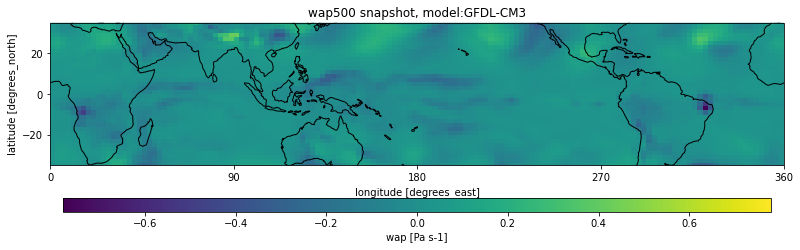

In [49]:
plot_snapshot(wap500.isel(time=0), 'viridis', 'wap500', model)

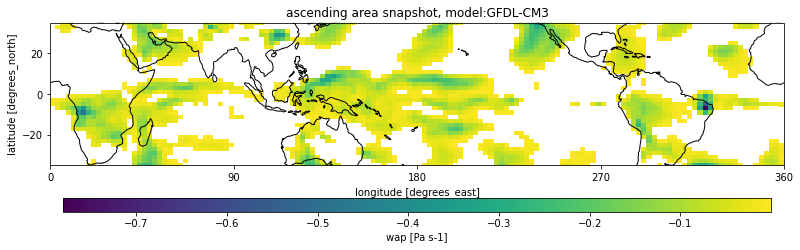

In [50]:
plot_snapshot(wap500.isel(time=0).where(wap500.isel(time=0)<0, np.nan), 'viridis', 'ascending area', model)

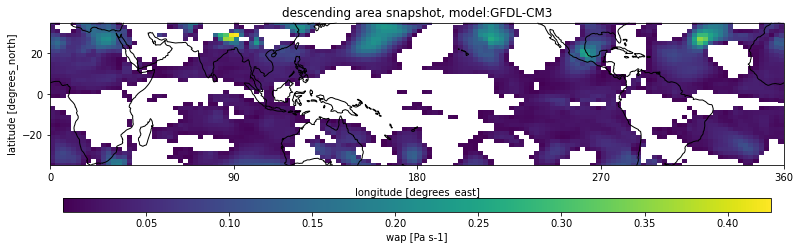

In [51]:
plot_snapshot(wap500.isel(time=0).where(wap500.isel(time=0)>0, np.nan), 'viridis', 'descending area', model)

In [52]:
def regrid_conserv_np(M_in, M_out):

    # dimensions
    dlat = M_in.lat.data[1]-M_in.lat.data[0]
    dlon = M_in.lon.data[1]-M_in.lon.data[0]
    latBnds = (M_in.lat.data-(dlat/2), M_in.lat.data+(dlat/2))
    lonBnds = (M_in.lon.data-(dlon/2), M_in.lon.data+(dlon/2))
    lat = np.mean(latBnds, axis=0)
    lon = np.mean(lonBnds, axis=0)
    # area of gridboxes as fraction of earth surface area
    area_wlat = np.cos(np.deg2rad(lat))*dlat*np.pi/(4*180^2)

    dlat_n = M_out.lat.data[1]-M_out.lat.data[0]
    dlon_n = M_out.lon.data[1]-M_out.lon.data[0]
    latBnds_n = (M_out.lat.data-(dlat_n/2), M_out.lat.data+(dlat_n/2))
    lonBnds_n = (M_out.lon.data-(dlon_n/2), M_out.lon.data+(dlon_n/2))
    lat_n = np.mean(latBnds_n, axis=0)
    lon_n = np.mean(lonBnds_n, axis=0)

    # weights
    Wlat = np.zeros([len(lat_n), len(lat)])
    for i in np.arange(0,len(lat_n)):
        latBoxMin_n = latBnds_n[0][i]
        latBoxMax_n = latBnds_n[1][i]

        # gridboxes that are atleast partially overlapping with iteration gridbox
        J = (latBnds[0]<=latBoxMax_n)*(latBnds[1]>= latBoxMin_n)*area_wlat

        # including fractional area component contribution
        I = J*(latBnds[1]-latBoxMin_n)/dlat
        K = J*(latBoxMax_n-latBnds[0])/dlat
        II = np.min([I,J,K], axis=0)

        # weights from individual gridboxes contributing to the new gridbox as fraction of the total combined area contribution
        Wlat[i,:] = II/np.sum(II)

    Wlon = np.zeros([len(lon_n), len(lon)])
    for i in np.arange(0,len(lon_n)):
        lonBoxMin_n = lonBnds_n[0][i]
        lonBoxMax_n = lonBnds_n[1][i]

        # gridboxes that are atleast partially overlapping with iteration gridbox
        J = (lonBnds[0]<=lonBoxMax_n)*(lonBnds[1]>= lonBoxMin_n)*1

        # Including fractional area component contribution
        I = J*(lonBnds[1]-lonBoxMin_n)/dlon
        K = J*(lonBoxMax_n-lonBnds[0])/dlon
        L = J*(lonBoxMax_n-lonBnds[0]+360)/dlon
        II = np.min([I,J,K,L], axis=0)

        # weights from individual gridboxes contributing to the new gridbox as fraction of the total combined area contribution
        Wlon[i,:] = II/np.sum(II)

    # interpolation
    M_n = np.zeros([len(M_in.time.data), len(lat_n), len(lon_n)])
    for day in np.arange(0,len(M_in.time.data)):
        M_Wlat = np.zeros([len(lat_n), len(lon)])

        for i in range(0, np.shape(Wlat)[0]):
            M_Wlat[i,:] = np.nansum(M_in.isel(time=day) * np.vstack(Wlat[i,:]),axis=0)/np.sum(~np.isnan(M_in.isel(time=day))*1*np.vstack(Wlat[i,:]),axis=0)
            
        for i in range(0, np.shape(Wlon)[0]):
            M_n[day,:,i] = np.nansum(M_Wlat * Wlon[i,:],axis=1)/np.sum(~np.isnan(M_Wlat)*1*Wlon[i,:], axis=1)

    return M_n

In [53]:
M_out = xr.open_dataset(home + '/Documents/data/cmip5/FGOALS-g2/FGOALS-g2_ds_regid_historical.nc')

In [54]:
wap500_n = regrid_conserv_np(wap500, M_out)
wap500_n

array([[[ 3.70684698e-02,  6.16748308e-02,  8.42434764e-02, ...,
         -2.46805282e-02, -4.70891132e-02, -3.03697484e-02],
        [ 3.01830448e-02,  5.02043467e-02,  6.68793082e-02, ...,
         -1.29791166e-04, -3.22767246e-02, -2.54626184e-02],
        [ 3.00568435e-02,  4.07207851e-02,  4.57137231e-02, ...,
          4.52101305e-03, -1.19036844e-02, -5.21992727e-03],
        ...,
        [ 1.13944766e-01,  1.26398923e-01,  1.13559888e-01, ...,
          4.81758803e-02,  9.10210919e-02,  1.11710105e-01],
        [ 1.16971409e-01,  1.26351139e-01,  1.10743768e-01, ...,
          3.37705012e-02,  7.44201490e-02,  1.14388330e-01],
        [ 7.18618051e-02,  6.63664816e-02,  3.60933568e-02, ...,
          3.83046355e-02,  2.08158507e-02,  5.15774898e-02]],

       [[-7.15242669e-03, -7.73378285e-03, -1.40348181e-03, ...,
          5.63722279e-02,  3.53075299e-02,  1.15607699e-02],
        [ 2.02684351e-02,  2.27815776e-02,  2.77073113e-02, ...,
          4.70804267e-02,  3.10220344e

In [55]:
wap500_n = xr.DataArray(
    data = wap500_n,
    dims = ['time', 'lat', 'lon'],
    coords = {'time': wap500.time.data, 'lat': M_out.lat.data, 'lon': M_out.lon.data},
    attrs = wap500.attrs
    )

In [56]:
wap500_n

<xarray.DataArray (time: 12775, lat: 22, lon: 128)>
array([[[ 3.70684698e-02,  6.16748308e-02,  8.42434764e-02, ...,
         -2.46805282e-02, -4.70891132e-02, -3.03697484e-02],
        [ 3.01830448e-02,  5.02043467e-02,  6.68793082e-02, ...,
         -1.29791166e-04, -3.22767246e-02, -2.54626184e-02],
        [ 3.00568435e-02,  4.07207851e-02,  4.57137231e-02, ...,
          4.52101305e-03, -1.19036844e-02, -5.21992727e-03],
        ...,
        [ 1.13944766e-01,  1.26398923e-01,  1.13559888e-01, ...,
          4.81758803e-02,  9.10210919e-02,  1.11710105e-01],
        [ 1.16971409e-01,  1.26351139e-01,  1.10743768e-01, ...,
          3.37705012e-02,  7.44201490e-02,  1.14388330e-01],
        [ 7.18618051e-02,  6.63664816e-02,  3.60933568e-02, ...,
          3.83046355e-02,  2.08158507e-02,  5.15774898e-02]],

       [[-7.15242669e-03, -7.73378285e-03, -1.40348181e-03, ...,
          5.63722279e-02,  3.53075299e-02,  1.15607699e-02],
        [ 2.02684351e-02,  2.27815776e-02,  2.77073113e-02, ...,
          4.70804267e-02,  3.10220344e-02,  2.05668589e-02],
        [ 2.41081321e-02,  2.65934961e-02,  2.76619558e-02, ...,
          4.15206274e-02,  2.72154441e-02,  2.11744223e-02],
...
        [ 7.73367590e-02,  9.33109771e-02,  1.01833801e-01, ...,
          1.45328844e-02,  1.06231536e-02,  3.11864127e-02],
        [ 1.39013537e-01,  1.49199576e-01,  1.52102718e-01, ...,
          7.23468773e-03,  1.90327152e-02,  6.73496994e-02],
        [ 1.83072942e-01,  1.84978172e-01,  1.69376726e-01, ...,
          3.26016156e-02,  5.23721836e-02,  1.04000191e-01]],

       [[ 1.28017826e-01,  1.35320186e-01,  1.34780276e-01, ...,
          4.03716979e-03,  3.91531739e-02,  7.83346436e-02],
        [ 1.35230438e-01,  1.35863942e-01,  1.23518042e-01, ...,
          8.99234193e-03,  4.45959021e-02,  8.51080723e-02],
        [ 1.00666024e-01,  9.93378083e-02,  8.75305641e-02, ...,
          1.70059610e-02,  4.69825448e-02,  7.33059136e-02],
        ...,
        [ 1.33396804e-01,  1.34394488e-01,  1.11945595e-01, ...,
          3.99199216e-02,  2.70668404e-02,  5.30098318e-02],
        [ 2.18930957e-01,  2.24214403e-01,  2.07019764e-01, ...,
         -3.63510300e-03,  7.65648088e-03,  8.70154747e-02],
        [ 2.52359325e-01,  2.73308961e-01,  2.54063371e-01, ...,
         -5.93675382e-02, -6.71613240e-03,  7.61489049e-02]]])
Coordinates:
  * time     (time) object 2066-01-01 12:00:00 ... 2100-12-31 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    interp_method:     conserve_order2
    units:             Pa s-1
    long_name:         wap
    cell_methods:      time: mean
    valid_range:       [100. 350.]
    standard_name:     lagrangian_tendency_of_air_pressure
    original_units:    Pa/s
    original_name:     wap
    cell_measures:     area: areacella
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [57]:
import os
def save_file(dataSet, folder, fileName):
    
    os.makedirs(folder, exist_ok=True)
    path = folder + '/' + fileName

    if os.path.exists(path):
        os.remove(path)    
    
    dataSet.to_netcdf(path)

In [58]:
save = True
if save:
    folder = home + '/Documents/data/cmip5/ds'
    fileName = model + '_wap500_' +experiment + '.nc'
    dataSet = wap500_n
    save_file(dataSet, folder, fileName)

In [59]:
folder = home + '/Documents/data/cmip5/ds'
fileName = model + '_precip_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
precip = ds.precip*60*60*24
precip.attrs['units']= 'mm/day'

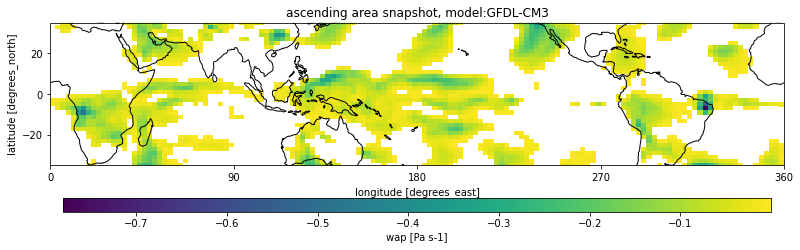

In [63]:
plot_snapshot(wap500.isel(time=0).where(wap500.isel(time=0)<0, np.nan), 'viridis', 'precipitaiton in ascending area', model)

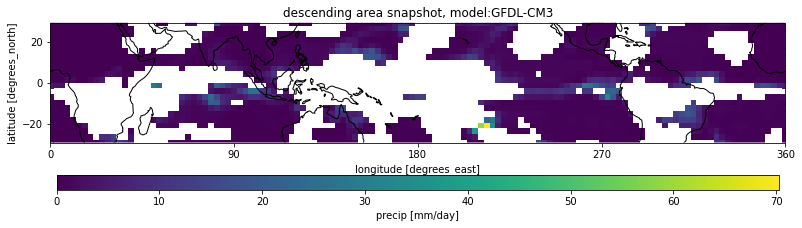

In [62]:
plot_snapshot(precip.isel(time=0).where(wap500_n.isel(time=0)>0, np.nan), 'viridis', 'precipitation in descending area', model)